In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from Esme.helper.io_related import make_dir
import os
sys.path.append('../')
from util import *


stair is of length 26


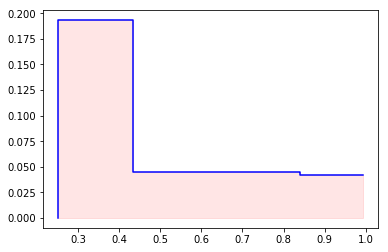

In [3]:
n = 30
f = np.random.random((n, 1))
f[10] = 0.1
distm = np.random.random((n, n))
distm = distm + distm.T
x = 10
sigma = 0.2
sigmas = [f[i][0] for i in range(n) if f[i][0] > sigma]
sigmas.sort()

stair = []
for sigma in sigmas:
    sig, eps = I_x(f, distm, x, sigma)
    stair.append((sig, eps))
print(f'stair is of length {len(stair)}')
viz_stair_(stair, color='red',alpha=.1)
# viz_stair_(stair, color='blue',alpha=.1)

viz_stair(stair, plot=True, show=True)


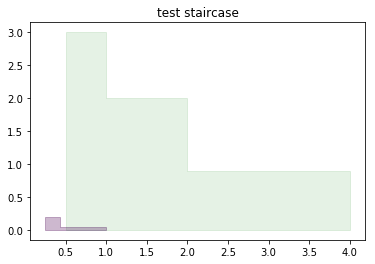

In [4]:
stair_ = [(0.5, 3),(1,2),(2,0.9),(4,0.5)]
stairs = [stair, stair_, stair, stair]
title='test staircase'
viz_stairs_(stairs, title=title, color=['red','green','blue','black'])


# point cloud

In [42]:
from sklearn.neighbors.kde import KernelDensity
from ptc_model import two_cycle
from sklearn.neighbors.kde import KernelDensity
from Esme.helper.format import precision_format as pf

from ptc_model import two_cycle
from I_x.I_x_slice import I_x_slice_
from util import viz_stair, get_epsilon
from viz import viz_pd

from time import time
import sys
from joblib import Parallel, delayed
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser
from example import get_stair

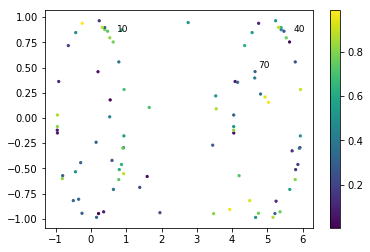

In [43]:
start_t = time()
idx = 10
n = 30
show_flag = True
save_flag = False

# specify toy models
points, distm = two_cycle(n)
if show_flag: viz_pd(points, show=True, color=None, annotate=[10, 10+n, 10+2*n])

f = - density(points).reshape(len(points),1)


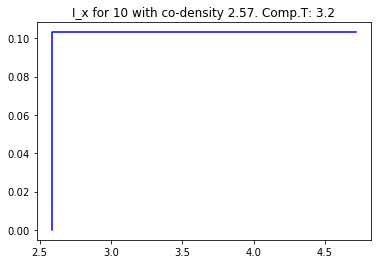

In [44]:
stair = get_stair(f, distm, idx=idx, method='heu')

# viz
end_t = time()
title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')


In [46]:
if False:
    stairs = []
    show_flag = False
    # idx_set = range(1,100,20)
    idx_set = range(1, 3*n, 1)
    for idx in idx_set:
        stair = get_stair(f, distm, idx=idx, method='heu')
        stairs.append(stair)

        # viz
        end_t = time()
        title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
        viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')


.........................................................................................

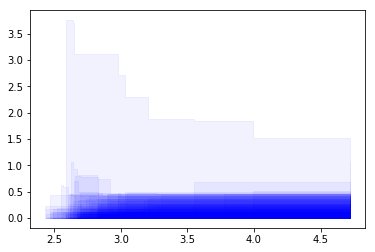

In [48]:
f = f
f_sort = copy.deepcopy(f).reshape((len(f),)).tolist() # # f_sort is a global variable
f_sort.sort()
idx_sort = get_idxsort(f, f_sort)

sigmas = f.reshape(len(f),).tolist()
sigmas.sort()

G = set_graph(f.shape[0], f, distm)
G = get_subgraph(f, 0, distm)

subgraphs = {0: G}
if args.re:
    for i in range(len(sigmas)-1): # sigmas = np.linspace(0, 1, 10)
        G  = update_subgraph(G, f, distm, sigmas[i], sigmas[i+1])

        home = str(Path.home())
        file = os.path.join(home, 'Documents', 'DeepLearning', 'Clustering', 'subgraphs', str(i+1) + '.pkl')
        with open(file, 'wb') as handle:
            pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

        subgraphs[sigmas[i + 1]] = G

    if args.verbose > 1:
        for k in subgraphs_.keys():
            print(f'sigma is {pf(k,2)} and num of edges is {len(subgraphs[k].edges())}/{len(subgraphs_[k].edges())}.')

dgm = []
for sigma in sigmas[1:]:
    dgm_slice = D_x_slice_clean(f, f_sort, idx_sort, sigma, sigmas) # [{key: (sigma, epsilon)}, ...]
    dgm.append(dgm_slice) # dgm is a list of dict of form {x:(sig,eps), ...}

res = dgm_format(dgm, filter = True)
viz_stairs_(res, alpha=.05)


In [ ]:
# check correctness of get_stair and dgm
# print(res[2])
for idx in range(1,90):
    method = 'heu'# 'heu'
    res1 = get_stair(f, distm, idx=idx, method=method)
    coor = 0
    
    lis1 = list(set(map(lambda x: x[coor], res1)))
#     print(lis1)
    
    res2 = []
    for s in dgm:
        for k, v in s.items():
            if k==float(idx): res2.append(v[coor])
    lis2 = list(set(res2))
#     print(lis2)
    for l in lis1:
        if l not in lis2:
            print(f'lis1 {lis1} and lis2 {lis2}')
    
#     print('-'*20)

# res2 = res[3]
# print(res2)

In [ ]:
res2
res2 = []
idx = 2
res1 = get_stair(f, distm, idx=idx, method='bf')
for s in dgm:
    for k, v in s.items():
        if k==float(idx): res2.append(v)
                
for tmp in [res1, res2]:
    viz_stair(tmp, show=True, title=title, save=False)


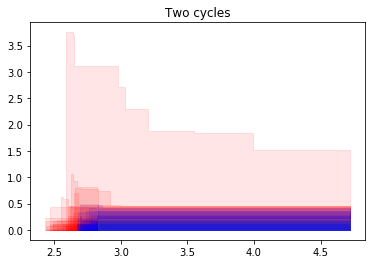

In [51]:
title = f'Two cycles'
colors = ['red'] *(n-1)  + ['blue'] * n + ['yellow'] * n
viz_stairs_(res[:2*n], title=title, color=colors)

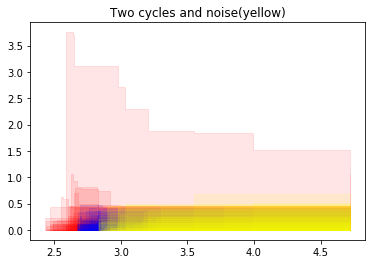

In [52]:
title = f'Two cycles and noise(yellow)'
colors = ['red'] *(n-1)  + ['blue'] * n + ['yellow'] * n
viz_stairs_(res, title=title, color=colors)

In [ ]:
import copy
import os
import pickle
import sys
from time import time
from sys import getsizeof
from pathlib import Path
sys.path.append('../I_x/')
import networkx as nx
import numpy as np
from joblib import delayed, Parallel
from profilehooks import profile
from util import viz_stairs_
import matplotlib.pyplot as plt


from I_x.I_x_slice import set_graph
from I_x.mst_test import get_ultra_matrix
from helper.time import precision_format as pf
from helper.time import timefunction
from I_x.dgm2d import *
TOR = 1e-6
np.random.random(42)

set_dir()
sys.argv = []
parser = ArgumentParser("scoring", formatter_class=ArgumentDefaultsHelpFormatter, conflict_handler='resolve')
args = parser.parse_args()
args.n = 100
args.re = True
args.n_jobs = -1
args.verbose = 0
n = args.n # 2000

f = np.random.random((n, 1))
f[10] = 0.1
distm = np.random.random((n, n))
distm = distm + distm.T

global sigmas
sigmas = f.reshape(n,).tolist()
sigmas.sort()

f_sort = copy.deepcopy(f).reshape((n,)).tolist() # # f_sort is a global variable
f_sort.sort()
idx_sort = get_idxsort(f, f_sort)

G = set_graph(f.shape[0], f, distm)
G = get_subgraph(f, 0, distm)

subgraphs = {0: G}
subgraphs_ = {}
if args.re:
    for i in range(len(sigmas)-1): # sigmas = np.linspace(0, 1, 10)
        G  = update_subgraph(G, f, distm, sigmas[i], sigmas[i+1])

        home = str(Path.home())
        file = os.path.join(home, 'Documents', 'DeepLearning', 'Clustering', 'subgraphs', str(i+1) + '.pkl')
        with open(file, 'wb') as handle:
            pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

        subgraphs[sigmas[i + 1]] = G

    if args.verbose > 1:
        for k in subgraphs_.keys():
            print(f'sigma is {pf(k,2)} and num of edges is {len(subgraphs[k].edges())}/{len(subgraphs_[k].edges())}.')

dgm = []
for sigma in sigmas[1:]:
    dgm_slice = D_x_slice_clean(f, f_sort, idx_sort, sigma, sigmas) # [{key: (sigma, epsilon)}, ...]
    dgm.append(dgm_slice) # dgm is a list of dict of form {x:(sig,eps), ...}


res = dgm_format(dgm, filter = False)
viz_stairs_(res[10:20], alpha=.05)

# Graph

In [1]:
import sys
sys.path.append('../')
from model.graph import graph_gen
from model.viz_graph import viz_graph
    

In [2]:
def get_dgm(G, f, distm):
    sigmas = f.reshape(n,).tolist()
    sigmas.sort()

    f_sort = copy.deepcopy(f).reshape((n,)).tolist() # # f_sort is a global variable
    f_sort.sort()
    idx_sort = get_idxsort(f, f_sort)

    
    subgraphs = {0: G}
    if args.re:
        for i in range(len(sigmas)-1): # sigmas = np.linspace(0, 1, 10)
            G  = update_subgraph(G, f, distm, sigmas[i], sigmas[i+1])

            home = str(Path.home())
            file = os.path.join(home, 'Documents', 'DeepLearning', 'Clustering', 'subgraphs', str(i+1) + '.pkl')
            with open(file, 'wb') as handle:
                pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

            subgraphs[sigmas[i + 1]] = G

        if args.verbose > 1:
            for k in subgraphs_.keys():
                print(f'sigma is {pf(k,2)} and num of edges is {len(subgraphs[k].edges())}/{len(subgraphs_[k].edges())}.')

    dgm = []
    for sigma in sigmas[1:]:
        dgm_slice = D_x_slice_clean(f, f_sort, idx_sort, sigma, sigmas) # [{key: (sigma, epsilon)}, ...]
        dgm.append(dgm_slice) # dgm is a list of dict of form {x:(sig,eps), ...}
    return dgm


In [3]:
import copy
import os
import pickle
import sys
from time import time
from sys import getsizeof
from pathlib import Path
sys.path.append('../I_x/')
import networkx as nx
import numpy as np
from joblib import delayed, Parallel
from profilehooks import profile
from util import viz_stairs_, viz_stair_
%matplotlib inline

from I_x.I_x_slice import set_graph
from I_x.mst_test import get_ultra_matrix
from helper.time import precision_format as pf
from helper.time import timefunction
from I_x.dgm2d import *
TOR = 1e-6
np.random.random(42)

set_dir()
sys.argv = ['']
parser = ArgumentParser("scoring", formatter_class=ArgumentDefaultsHelpFormatter, conflict_handler='resolve')
args = parser.parse_args()
args.n = 100
args.re = True
args.n_jobs = -1
args.verbose = 0
n = args.n # 2000



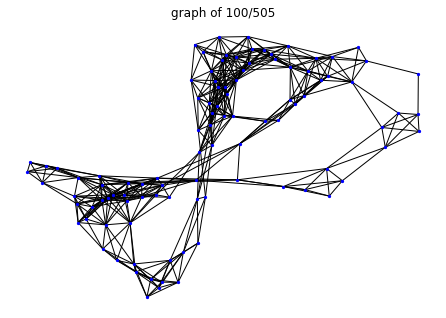

100
Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

...................................................................................................

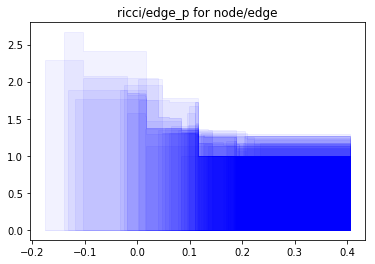

In [40]:
# can change type from geo to tree 
g, f, distm, _ = graph_gen(n = 100, type='geo')
viz_graph(g, show=True)

print(f.shape[0])
G = set_graph(f.shape[0], f, distm)
G = get_subgraph(f, -100, distm)
print(nx.info(G))

dgm = get_dgm(G, f, np.exp(-10*distm))
res = dgm_format(dgm, filter = True)
viz_stairs_(res, alpha=.05, title='ricci/edge_p for node/edge')


# points on the line

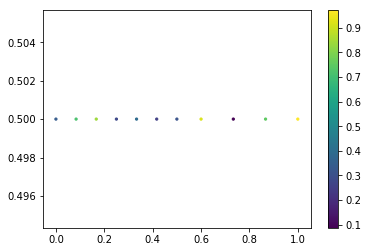

In [36]:
# change uniform to true to see diagram for points of equally spaced
from ptc_model import point_online
from example import density, get_stair
from util import viz_stair
from viz import viz_pd
show_flag = True
uniform=False
points, distm = point_online(uniform=uniform)

if show_flag: viz_pd(points, show=True, color=None, annotate=None)

f = - density(points).reshape(len(points),1)


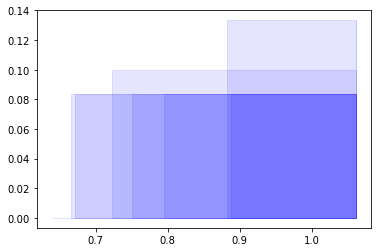

In [37]:
start_t = time()
stairs = []
show_flag = False
idx_set = range(len(f))
for idx in idx_set:
    stair = get_stair(f, distm, idx=idx, method='heu')
    stairs.append(stair)

    # viz
    end_t = time()
    title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
#     viz_stair_(stair)
#     viz_stair(stair, show=show_flag, title=title, save=False, dir='./img/', f=f'{idx}.png')
viz_stairs_(stairs)


In [ ]:
class prettyfloat(tuple):
    def __repr__(self):
        return "(%0.2f" % self[0] + ", %0.2f" % self[1] + ")"
    
for stair in stairs:
    stair = list(map(prettyfloat,stair))
    print(stair)

In [ ]:
stairs[5]